# Data-Visualisation, Titanic


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; 

In [6]:
train = pd.read_csv("data/cleantrain.csv", sep=',')
test = pd.read_csv("data/cleantest.csv", sep =',')
survivant = train.where(train['Survived']==1).dropna()

Text(0.5, 0, 'Age')

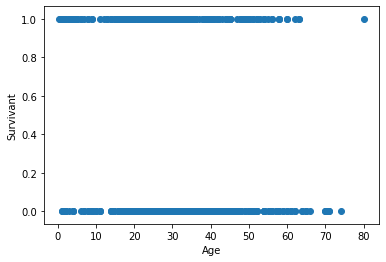

In [7]:
plt.scatter(train['Age'], train['Survived'])
plt.ylabel("Survivant")
plt.xlabel("Age")

Text(0.5, 0, 'Tarifs')

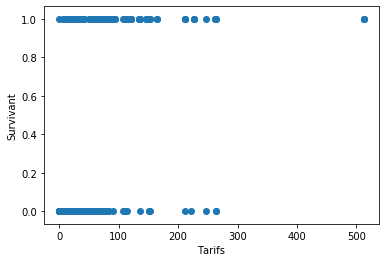

In [8]:
plt.scatter(train['Fare'], train['Survived'])
plt.ylabel("Survivant")
plt.xlabel("Tarifs")

### Le pourcentage de Personne ayant survécu a ce drâme 

([<matplotlib.patches.Wedge at 0x157ba5af4c8>,
 [Text(-1.055381692889118, -0.3101120479995897, 'Naufragés'),
  Text(1.1513254514774485, 0.3383041601580589, 'Survivants')],
 [Text(-0.5756627415758825, -0.16915202618159436, '59.1%'),
  Text(0.671606513361845, 0.19734409342553433, '40.9%')])

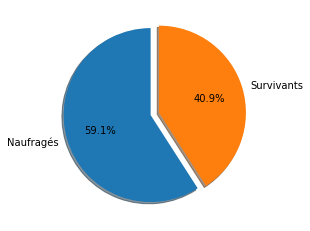

In [15]:
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(train['Survived'].value_counts(), explode=explode, labels=['Naufragés', 'Survivants'], autopct='%1.1f%%',
        shadow=True, startangle=90)

(array([ 97.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 202.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

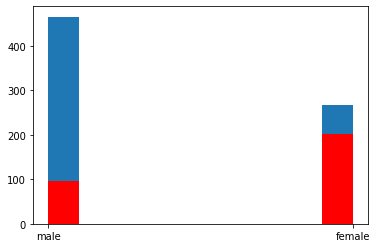

In [12]:
#Le sexe survivant
plt.hist(train['Sex'])
plt.hist(train['Sex'].where(train['Survived'] == 1).dropna(), color="r")

## Les Survivants par lieux d'embarquements

(array([207.,   0.,   0.,   0.,   0.,  83.,   0.,   0.,   0.,   9.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

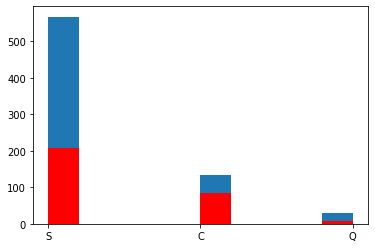

In [9]:
#L'endroit ou on embarqué les survivants 
plt.hist(train['Embarked'])
plt.hist(train['Embarked'].where(train['Survived'] == 1).dropna(), color="r")

###  Les classes sociales qui ont le plus survécu 
#### 1ere classe a gauche, 3 eme à droite

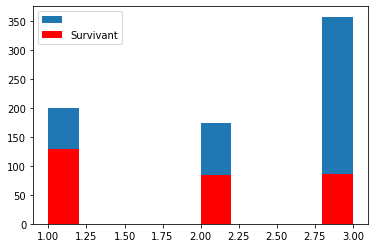

In [69]:
#Les classes sociales qui ont le plus survécu 
plt.hist(train['Pclass'])
plt.hist(train['Pclass'].where(train['Survived'] == 1).dropna(), color="r")
plt.legend(['','Survivant'])

#### Analyse :
<p>On peut observer ici que le nombre de survivant dans chaque catégorie social n'est pas équitable, on observe facilement que les personnes en 1ere classe on plus de la moitié de survivants,ce qui est bien superieur au taux de survivants des autres classes, qui se valent entre elles. </p>
<h4> Hypothese :</h4> La classe sociale, est elle un facteur de survie lors du crash du titanic ? 

### En Rouge Les enfants et les parents , trier par sexe , et en jaune ce qui ont survécu

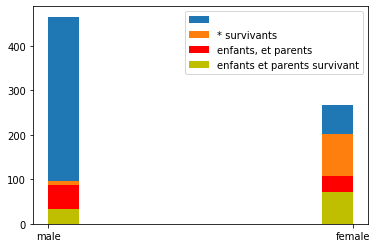

In [113]:
zz = pd.concat([train.where(train["Age"] < 18).dropna(), train.where(train["Parch"] > 1).dropna()])
plt.hist(train['Sex'])
plt.hist(train['Sex'].where(train['Survived']== 1).dropna())
plt.hist(zz['Sex'], color="r")
plt.hist(zz['Sex'].where(zz['Survived'] == 1 ).dropna(), color='y')
plt.legend(['','* survivants','enfants, et parents',"enfants et parents survivant"])

#### Analyse :
<p>On à ici une représentations les sexes sur le bateau, En rouge sont representés les enfants ou leur parents , la partie en jaune les survécus, en bleu la totalité des personnes sur le bateau. On peut voir ici que les meres et leur filles ont eu plus de chance de taux de survie que les peres et leurs fils. On observe que les taux sont plus ou moin proche des taux de survivants globaux. </p>
<h4> Hypothèses : </h4>Avoir un enfants ou l'ètre, augmentais t-il nos chance de survie lors du drame ? 

### Le Tarif du tickets en fonction des ages 
#### les survivants sont en violet 

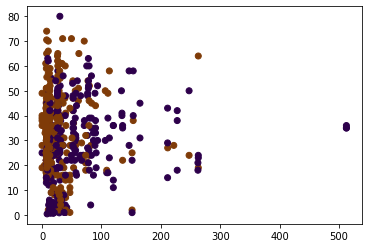

In [74]:
plt.scatter(train['Fare'], train['Age'], c=train['Survived'], cmap="PuOr")

#### Hypothèses : Le tarifs du ticket avait-il une insidance sur la survie des passagers ? 

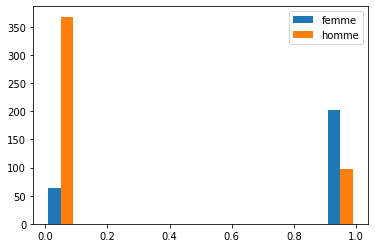

In [115]:
fem = train.where( train['Sex']=='female').dropna()
hom = train.where( train['Sex']=='male').dropna()
plt.hist([fem['Survived'],hom['Survived']])
plt.legend(['femme','homme'])

#### Hypothèses : Les femmes ont elle significativement plus de chance de survivre que les hommes? 

{'whiskers': [<matplotlib.lines.Line2D at 0x157be6d5d08>,
 'caps': [<matplotlib.lines.Line2D at 0x157be6ebdc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x157be6eb5c8>],
 'medians': [<matplotlib.lines.Line2D at 0x157be6f1dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x157be6f1e48>],
 'means': []}

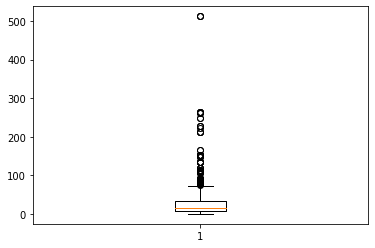

In [128]:
plt.boxplot(train['Fare'])

## Matrice de Corrélations du Trains set

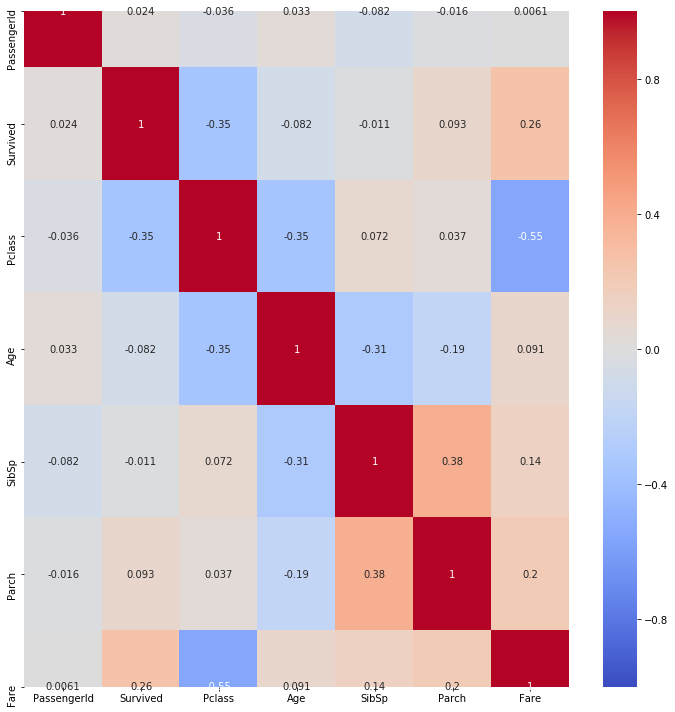

In [16]:
fig, ax = plt.subplots(figsize=(10,10))  
corr = train.corr()
ax =sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.tight_layout()
plt.show()